In [7]:
import numpy as np
import ast
import heapq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import warnings
from collections import deque



cali_trans = np.array([[  0.        ,   0.        ,   0.        , 1,
          0.        ],
       [466.98922175,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        , 482.45576649,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        , 531.94240303, 534.88991217,
        537.8348471 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        544.57966736],
       [539.39530067, 542.34668762, 545.296116  ,   0.        ,
          0.        ],
       [545.8128568 ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [551.93973806,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61224713,
          0.        ],
       [  0.        ,   0.        , 594.66382175, 597.61197776,
          0.        ],
       [  0.        ,   0.        , 599.026636  ,   0.        ,
          0.        ],
       [  0.        , 600.6848481 , 603.6332481 ,   0.        ,
          0.        ],
       [602.56420404, 605.51640914,   0.        ,   0.        ,
          0.        ],
       [607.65989686, 610.60973092,   0.        ,   0.        ,
          0.        ],
       [613.18040057,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88389115],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        603.77622285],
       [  0.        ,   0.        ,   0.        , 606.64997073,
        609.59632907],
       [  0.        ,   0.        , 609.01680555,   0.        ,
          0.        ],
       [  0.        ,   0.        , 613.93423117, 616.88226792,
        619.82677802],
       [  0.        ,   0.        , 618.46850091, 621.4167308 ,
          0.        ],
       [  0.        , 619.61628867, 622.56496579,   0.        ,
          0.        ],
       [  0.        , 623.099117  ,   0.        ,   0.        ,
          0.        ],
       [1,   0.        ,   0.        ,   0.        ,
          0.        ]])
all_trans = np.array([[  0.        , 457.75999873, 460.72196955, 463.68394036,
        466.62977127],
       [466.99294802, 469.97486848, 472.95678894, 475.93870939,
        478.92062985],
       [479.47904242, 482.46096288, 485.41016996, 488.35937703,
          0.        ],
       [  0.        ,   0.        , 531.94544764, 534.89326135,
        537.83854745],
       [  0.        , 535.74653352, 538.69236443, 541.63819534,
        544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,
        551.22454963],
       [545.81732716, 548.79924762, 551.78116808, 554.76308853,
          0.        ],
       [551.94477172, 554.92669218, 557.90861264,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,
        596.56112077],
       [  0.        ,   0.        , 594.66692293, 597.61531136,
        600.56114227],
       [  0.        , 596.08091873, 599.0301258 , 601.99209662,
        604.95406743],
       [597.61531136, 600.68852942, 603.63732816, 606.65422318,
        609.60081274],
       [602.56807045, 605.52057971, 608.46978678, 611.41899386,
          0.        ],
       [607.66418416, 610.61441874, 613.56362581,   0.        ,
          0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,
        603.78023499],
       [  0.        ,   0.        , 603.69225236, 606.65422318,
        609.60081274],
       [  0.        , 606.07214876, 609.02135584, 611.98332665,
        614.94529747],
       [608.04091204, 610.99011912, 613.93932619, 616.8876211 ,
        619.83247952],
       [612.5755976 , 615.52480467, 618.47401175, 621.42247375,
          0.        ],
       [616.63994273, 619.62186318, 622.57092288,   0.        ,
          0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,
          0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,
          0.        ]])

all_trans_test = np.array([[  0.        , 457.75999873, 460.72196955, 463.68394036,
        466.62977127],
       [466.99294802, 469.97486848, 472.95678894, 475.93870939,
        478.92062985],
       [479.47904242, 482.46096288, 485.41016996, 488.35937703,
          0.        ],
       [  0.        ,   0.        , 531.94544764, 534.89326135,
        537.83854745],
       [  0.        , 535.74653352, 538.69236443, 541.63819534,
        544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,
        551.22454963],
       [545.81732716, 548.79924762, 551.78116808, 554.76308853,
          0.        ],
       [551.94477172, 554.92669218, 557.90861264,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,
        596.56112077],
       [  0.        ,   0.        , 594.66692293, 597.61531136,
        600.56114227],
       [  0.        , 596.08091873, 599.0301258 , 601.99209662,
        604.95406743],
       [597.61531136, 600.68852942, 603.63732816, 606.65422318,
        609.60081274],
       [602.56807045, 605.52057971, 608.46978678, 611.41899386,
          0.        ],
       [607.66418416, 610.61441874, 613.56362581,   0.        ,
          0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,
        603.78023499],
       [  0.        ,   0.        , 603.69225236, 606.65422318,
        609.60081274],
       [  0.        , 606.07214876, 609.02135584, 611.98332665,
        614.94529747],
       [608.04091204, 610.99011912, 613.93932619, 616.8876211 ,
        619.83247952],
       [612.5755976 , 615.52480467, 618.47401175, 621.42247375,
          0.        ],
       [616.63994273, 619.62186318, 622.57092288,   0.        ,
          0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,
          0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,
          0.        ]])

all_trans_without_mf0 = np.array([[  0.        , 0, 0, 463.68394036,466.62977127],
       [466.99294802, 469.97486848, 0, 475.93870939,478.92062985],
       [479.47904242, 482.46096288, 0, 488.35937703,0.        ],
       [  0.        ,   0.        , 0, 534.89326135,537.83854745],
       [  0.        , 535.74653352, 0, 541.63819534,544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,551.22454963],
       [545.81732716, 548.79924762, 0, 554.76308853,0.        ],
       [551.94477172, 554.92669218, 0,   0.        ,0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,596.56112077],
       [  0.        ,   0.        , 0, 597.61531136,600.56114227],
       [  0.        , 596.08091873, 0 , 601.99209662,604.95406743],
       [597.61531136, 600.68852942, 0, 606.65422318,609.60081274],
       [602.56807045, 605.52057971, 0, 611.41899386, 0.        ],
       [607.66418416, 610.61441874, 0,   0.        ,0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,603.78023499],
       [  0.        ,   0.        , 0, 606.65422318,609.60081274],
       [  0.        , 606.07214876, 0, 611.98332665,614.94529747],
       [608.04091204, 610.99011912, 0, 616.8876211 ,619.83247952],
       [612.5755976 , 615.52480467, 0, 621.42247375,0.        ],
       [616.63994273, 619.62186318, 0,   0.        , 0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,0.        ]])

transition_strengths = np.array([[np.nan, 0.0563, 0.055, 0.0519, 0.0341],
                        [0.0753, 0.0246, 0.0096, 0.0336, 0.056],
                        [0.053, 0.0598, 0.047, 0.0355, np.nan],
                        [np.nan, np.nan, 0.1103, 0.1061, 0.0819],
                        [np.nan, 0.1273, 0.0275, 0.0613, 0.0981],
                        [0.0973, 0.0635, 0.0919, 0.0258, 0.0932],
                        [0.1163, 0.0281, 0.0575, 0.107, np.nan],
                        [0.1105, 0.1056, 0.0814, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, 0.2813, 0.0091],
                        [np.nan, np.nan, 0.2288, 0.1549, 0.0415],
                        [np.nan, 0.1517, 0.2135, 0.0697, 0.0446],
                        [0.0763, 0.2008, 0.1741, 0.003, 0.0359],
                        [0.1367, 0.2351, 0.0773, 0.039, np.nan],
                        [0.2241, 0.1763, 0.0106, np.nan, np.nan],
                        [0.268, 0.0634, np.nan, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, np.nan, 0.3278],
                        [np.nan, np.nan, np.nan, 0.0828, 0.268],
                        [np.nan, np.nan, 0.0019, 0.1664, 0.234],
                        [np.nan, 0.025, 0.0679, 0.2278, 0.1523],
                        [0.0232, 0.001, 0.156, 0.2077, 0.0915],
                        [0.0309, 0.0593, 0.206, 0.1694, np.nan],
                        [0.0276, 0.1438, 0.2401, np.nan, np.nan],
                        [0.0094, 0.2862, np.nan, np.nan, np.nan],
                        [0.3278, np.nan, np.nan, np.nan, np.nan]])

pi_t = [19.305, 35.816, 42.483, 31.069, 39.749]

pitime_n2 = pi_t[0] # [-2, 4, -4]
pitime_n1 = pi_t[1] # [-2, 3, -3]
pitime_0 = pi_t[2] # [2, 4, 2]
pitime_p1 = pi_t[3] # [2, 4, 3]
pitime_p2 = pi_t[4] # [2, 4, 4]

factors = np.array([pitime_n2*0.3278,pitime_n1*0.268,pitime_0*0.234,pitime_p1*0.268,pitime_p2*0.3278])

Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times = np.zeros((24,5))
for i in range(np.shape(transition_strengths)[0]):
    for j in range(np.shape(transition_strengths)[1]):
        # print(i,j)
        if not np.isnan(transition_strengths[i,j]):
            # print(row_labels[i][1],col_labels[j])
            delta_m = (row_labels[i][1]-col_labels[j])+2
            # print(delta_m)
            pi_times[i,j] = factors[delta_m]/transition_strengths[i,j]
print(np.round(pi_times,3))
def get_pi_times(transitions,matrix = pi_times):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
    
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
        # Find the index of the column label
        col_index = col_labels.index(col_label)
        
        if row_index is not None and col_index in range(len(col_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list


an1_pitimes = np.genfromtxt('PiTime_scale_param.txt', delimiter=',', dtype=float)
# print(an1_pitimes)
pitime_n2 = pi_t[0] # [-2, 4, -4]
pitime_n1 = pi_t[1] # [-2, 3, -3]
pitime_0 = pi_t[2] # [2, 4, 2]
pitime_p1 = pi_t[3] # [2, 4, 3]
pitime_p2 = pi_t[4] # [2, 4, 4]

factors_an1 = np.array([pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2])

Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times_an1 = np.zeros((24,5))
for i in range(np.shape(an1_pitimes)[0]):
    for j in range(np.shape(an1_pitimes)[1]):
        # print(i,j)
        if not np.isnan(an1_pitimes[i,j]):
            # print(row_labels[i][1],col_labels[j])
            delta_m = (row_labels[i][1]-col_labels[j])+2
            # print(delta_m)
            pi_times_an1[i,j] = factors_an1[delta_m]*an1_pitimes[i,j]
# print(np.round(pi_times_an1,3))
# print(np.round(pi_times - pi_times_an1,3))

[[   0.     231.434  151.391  191.542  281.486]
 [ 173.037  338.475 1035.523  285.675  113.003]
 [ 157.104  166.238  204.227  178.259    0.   ]
 [   0.       0.     118.13    78.478  121.38 ]
 [   0.     102.354  302.782  162.17    97.846]
 [ 133.913  131.126  108.172  372.042   67.899]
 [  71.595  353.773  166.934   59.142    0.   ]
 [  89.964   90.897   77.742    0.       0.   ]
 [   0.       0.       0.      46.32   914.999]
 [   0.       0.      56.948   53.754  239.543]
 [   0.      85.891   39.     142.626  215.217]
 [ 170.77    41.467   57.099 3199.563  176.272]
 [  60.911   42.284  124.174  162.261    0.   ]
 [  44.36    54.445  596.998    0.       0.   ]
 [  35.816   99.814    0.       0.       0.   ]
 [   0.       0.       0.       0.      39.749]
 [   0.       0.       0.     157.364   31.069]
 [   0.       0.    6857.749   50.039   42.483]
 [   0.     521.189  122.629   43.639   63.025]
 [ 561.626 8326.492   63.724   46.214   69.16 ]
 [ 269.466  167.639   46.596   37.356   

FileNotFoundError: PiTime_scale_param.txt not found.

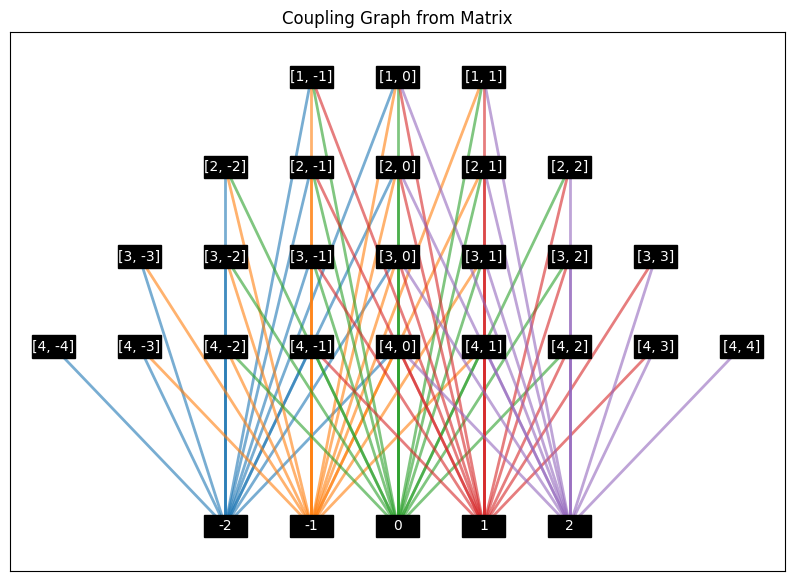

1001
(['[4, -1]', '1', '[2, -1]', '-2', '[3, -3]'], 5, 203.90923249457288)


In [13]:
import heapq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import warnings
from collections import deque

# Suppress specific numpy deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning, message="`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.")


def plot_coupling_graph_from_matrix(matrix,transition_strengths = transition_strengths, pos=None, show_graph = True):

    rows, cols = matrix.shape

    # Create a bipartite graph
    G = nx.Graph()
    Fs = [1, 2, 3, 4]
    row_labels = []
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            row_labels.append([i, mF])
    col_labels = [-2, -1, 0, 1, 2]

    # Add edges based on non-zero elements in the matrix and assign weights
    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] != 0:
                # print(transition_strengths[i, j])
                G.add_edge(f"{row_labels[i]}", f"{col_labels[j]}", weight=transition_strengths[i, j])

    # Generate positions for the nodes
    if pos is None:
        pos = {
            '-2': (-2, -2),
            '-1': (-1, -2),
            '0': (0, -2),
            '1': (1, -2),
            '2': (2, -2),
        }
    for i in row_labels:
        pos[f"{i}"] = (i[1], abs(i[0] - 4))
    for i in row_labels:
        G.add_node(f"{i}", pos=pos[f'{i}'])
    for j in col_labels:
        G.add_node(f"{j}", pos=pos[f'{i}'])
    if show_graph:
        colors = list(mcolors.TABLEAU_COLORS.values())
    
        plt.figure(figsize=(10, 7))
    
        # Draw edges with different colors for each column
        for j in range(cols):
            edges = [(f"{row_labels[i]}", f"{col_labels[j]}") for i in range(rows) if matrix[i, j] != 0]
            weights = [matrix[i, j] for i in range(rows) if matrix[i, j] != 0]
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors[j % len(colors)], width=2, alpha=0.6)
    
        # Draw nodes with rectangular patches
        xh = 0.5
        yh = 0.25
        ax = plt.gca()
        for node, (x, y) in pos.items():
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh, fill=True, color='black', ec='black', lw=1))
    
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')
    
        # Draw edge labels (weights)
        # edge_labels = nx.get_edge_attributes(G, 'weight')
        # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
        plt.xlim(-4.5, 4.5)
        plt.ylim(-2.5, 3.5)
    
        # Show the plot
        plt.title('Coupling Graph from Matrix')
        plt.show()

    return G


from collections import deque

# def find_shortest_paths_with_min_weight(start_node, end_node,matrix = all_trans,transition_strengths = transition_strengths,  min_weight=0.0519):

#     G = plot_coupling_graph_from_matrix(matrix, transition_strengths,show_graph = False)
#     queue = deque([[start_node]])
#     shortest_paths = []
#     shortest_length = float('inf')

#     while queue:
#         path = queue.popleft()
#         node = path[-1]

#         if node == end_node:
#             path_length = len(path)
#             total_weight = sum(G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))
#             if path_length < shortest_length:
#                 shortest_paths = [(path, path_length, total_weight)]
#                 shortest_length = path_length
#             elif path_length == shortest_length:
#                 shortest_paths.append((path, path_length, total_weight))
#         else:
#             for neighbor in G.neighbors(node):
#                 if neighbor not in path:  # Avoid cycles
#                     edge_weight = G[node][neighbor]['weight']
#                     if edge_weight >= min_weight:
#                         new_path = list(path)
#                         new_path.append(neighbor)
#                         queue.append(new_path)

#     return shortest_paths

def find_shortest_paths_with_min_weight(start_node, end_node,matrix = all_trans,weight_matrix = transition_strengths,  min_weight=0):
    G = plot_coupling_graph_from_matrix(matrix, weight_matrix, show_graph=False)
    G_strength = plot_coupling_graph_from_matrix(matrix, transition_strengths, show_graph=False)
    queue = deque([[start_node]])
    shortest_paths = []
    shortest_length = float('inf')

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node == end_node:
            path_length = len(path)
            total_weight_product = np.sum([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)])
            # print([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)],np.prod([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)]))
            # if path_length < shortest_length:
            #     shortest_paths = [(path, path_length, total_weight_product)]
            #     shortest_length = path_length
            # elif path_length == shortest_length:
            shortest_paths.append((path, path_length, total_weight_product))

        else:
            for neighbor in G.neighbors(node):
                # print(neighbor)
                # print(path)
                if neighbor not in path:  # Avoid cycles
                    edge_weight = G_strength[node][neighbor]['weight']
                    if edge_weight >= min_weight:
                        new_path = list(path)
                        new_path.append(neighbor)
                        queue.append(new_path)
        if len(shortest_paths) > 1000:
            break
    return shortest_paths


G = plot_coupling_graph_from_matrix(all_trans)
start_node = '[4, -1]'
end_node = '[3, -3]'
shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
# print(shortest_paths_with_weights)
# Print the shortest paths with their lengths and total weights
print(len(shortest_paths_with_weights))

fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
print(fastest_path)

In [15]:
import time

Fs = [1, 2, 3, 4]
row_labels = []
for i in Fs:
    for j in range(2 * i + 1):
        mF = i - j
        row_labels.append([i, mF])

col_labels = [-2,-1,0,1,2]

all_labels = row_labels + col_labels

list_all_fastest_paths = []
start_time = time.time()
for i in all_labels:
    for j in all_labels:
        start_node = str(i)
        end_node = str(j)
        shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = all_trans,weight_matrix = pi_times)
        fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
        current_time = time.time()
        print(current_time-start_time,' ',start_node, end_node, fastest_path)
        list_all_fastest_paths.append(fastest_path)
        


0.0009970664978027344   [1, 1] [1, 1] (['[1, 1]'], 1, 0.0)
0.3540527820587158   [1, 1] [1, 0] (['[1, 1]', '2', '[1, 0]'], 3, 394.4896480414747)
0.6362974643707275   [1, 1] [1, -1] (['[1, 1]', '0', '[1, -1]'], 3, 355.6181678916828)
0.745150089263916   [1, 1] [2, 2] (['[1, 1]', '0', '[2, 2]'], 3, 269.52061132448694)
0.8448829650878906   [1, 1] [2, 1] (['[1, 1]', '-1', '[2, 1]'], 3, 333.78824247278146)
1.0578210353851318   [1, 1] [2, 0] (['[1, 1]', '0', '[2, 0]'], 3, 259.5629290335345)
1.2991905212402344   [1, 1] [2, -1] (['[1, 1]', '1', '[2, -1]'], 3, 250.68370952406678)
1.4383246898651123   [1, 1] [2, -2] (['[1, 1]', '0', '[2, -2]'], 3, 229.1325203931204)
1.7086026668548584   [1, 1] [3, 3] (['[1, 1]', '1', '[3, 3]'], 3, 237.86151625915187)
1.8193068504333496   [1, 1] [3, 2] (['[1, 1]', '0', '[3, 2]'], 3, 208.33885017482515)
2.050687313079834   [1, 1] [3, 1] (['[1, 1]', '0', '[3, 1]'], 3, 190.39072616563763)
2.1444365978240967   [1, 1] [3, 0] (['[1, 1]', '0', '[3, 0]'], 3, 208.4902581797

KeyboardInterrupt: 

In [37]:
list_all_fastest_paths = []
with open('fastest_paths.txt', 'r') as f:
    for line in f:
        # Convert string representation of list back to actual list
        path = eval(line.strip())
        list_all_fastest_paths.append(path[:-1])
print(list_all_fastest_paths)

[(['[1, 1]'], 0.0), (['[1, 1]', '1', '[4, 2]', '2', '[1, 0]'], 400.58470657236546), (['[1, 1]', '0', '[1, -1]'], 357.0682479845261), (['[1, 1]', '1', '[2, 2]'], 269.0027340768062), (['[1, 1]', '-1', '[2, 1]'], 341.57263203660114), (['[1, 1]', '0', '[2, 0]'], 258.7946227797013), (['[1, 1]', '1', '[2, -1]'], 252.25680501323535), (['[1, 1]', '0', '[2, -2]'], 232.07578044226045), (['[1, 1]', '1', '[3, 3]'], 238.06707093613673), (['[1, 1]', '0', '[3, 2]'], 209.3926213986014), (['[1, 1]', '0', '[3, 1]'], 190.04571995741964), (['[1, 1]', '0', '[3, 0]'], 207.95517693697457), (['[1, 1]', '0', '[3, -1]'], 276.33939788780435), (['[1, 1]', '-1', '[3, -2]'], 291.73604239245833), (['[1, 1]', '-1', '[3, -3]'], 340.7757893663396), (['[1, 1]', '1', '[4, 2]', '2', '[4, 4]'], 323.5805065723655), (['[1, 1]', '1', '[4, 2]', '2', '[4, 3]'], 313.9172065723655), (['[1, 1]', '1', '[4, 2]'], 240.6155065723655), (['[1, 1]', '1', '[4, 1]'], 234.10714129116406), (['[1, 1]', '0', '[4, 0]'], 214.5499290909091), (['[

In [39]:
import numpy as np

# Your data
data = list_all_fastest_paths
# Function to check if a string is a node
def is_node(s):
    # return s.startswith('[') and s.endswith(']')
    return True

# Initialize lists to store nodes in the order they appear
all_nodes_in_order = []
node_set = set()  # To keep track of nodes that have been added

# Map nodes to indices
node_to_index = {}
index_to_node = []

# Collect nodes in order
for path_taken, _, _ in data:
    for element in path_taken:
        if is_node(element) and element not in node_set:
            node_set.add(element)
            all_nodes_in_order.append(element)
            node_to_index[element] = len(all_nodes_in_order) - 1
            index_to_node.append(element)

# Number of nodes
num_nodes = len(all_nodes_in_order)

# Initialize the matrix with NaNs
matrix = np.full((num_nodes, num_nodes), np.nan)

# Fill the matrix with path lengths
for path_taken, _, total_time in data:
    # Extract start and end nodes
    start_node = next((node for node in path_taken if is_node(node)), None)
    end_node = next((node for node in reversed(path_taken) if is_node(node)), None)
    
    if start_node and end_node:
        start_idx = node_to_index[start_node]
        end_idx = node_to_index[end_node]
        matrix[start_idx, end_idx] = total_time

# Function to print the matrix with labels
def print_matrix(matrix, row_labels, col_labels):
    # Print column headers
    header = "          " + " ".join(f"{label:>10}" for label in col_labels)
    print(header)
    # Print each row with row label
    for row_label, row in zip(row_labels, matrix):
        row_str = f"{row_label:>10}" + " ".join(f"{val:10.2f}" if not np.isnan(val) else f"{'NaN':>10}" for val in row)
        print(row_str)


ValueError: not enough values to unpack (expected 3, got 2)

In [41]:
import pandas as pd

# Your data
data = list_all_fastest_paths
# Function to check if a string is a node
def is_node(s):
    # return s.startswith('[') and s.endswith(']')
    return True

# Collect all unique nodes
nodes = set()
for path_taken, _, _ in data:
    for element in path_taken:
        if is_node(element):
            nodes.add(element)

nodes = sorted(nodes)

# Initialize the matrix as a DataFrame
matrix_df = pd.DataFrame(index=nodes, columns=nodes)

# Fill the matrix
for path_taken, _, total_time in data:
    # Extract start and end nodes
    start_node = next((node for node in path_taken if is_node(node)), None)
    end_node = next((node for node in reversed(path_taken) if is_node(node)), None)
    
    if start_node and end_node:
        matrix_df.loc[start_node, end_node] = total_time

# Display the matrix
print(matrix_df)


ValueError: not enough values to unpack (expected 3, got 2)

In [15]:
Fs = [1, 2, 3, 4]
row_labels = []
for i in Fs:
    for j in range(2 * i + 1):
        mF = i - j
        row_labels.append([i, mF])

col_labels = [-2,-1,0,1,2]

all_labels = row_labels + col_labels
pi_times_array = np.zeros([29,29])
for i,r in enumerate(all_labels):
    for j,c in enumerate(all_labels):
        pi_times_array[i,j] = matrix_df.loc[str(r),str(c)]

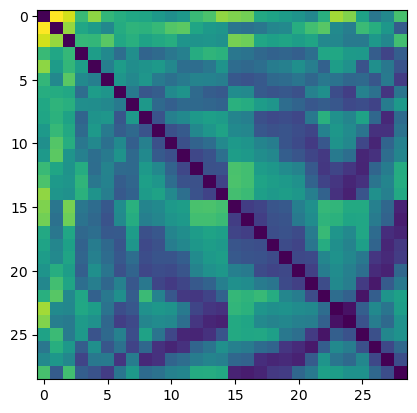

In [17]:
import matplotlib.pyplot as plt

plt.imshow(pi_times_array)

Available variables in the .mat file:
dict_keys(['__header__', '__version__', '__globals__', 'Sen_matrix', 'list_of_lables'])
Successfully loaded a 29x29 matrix.


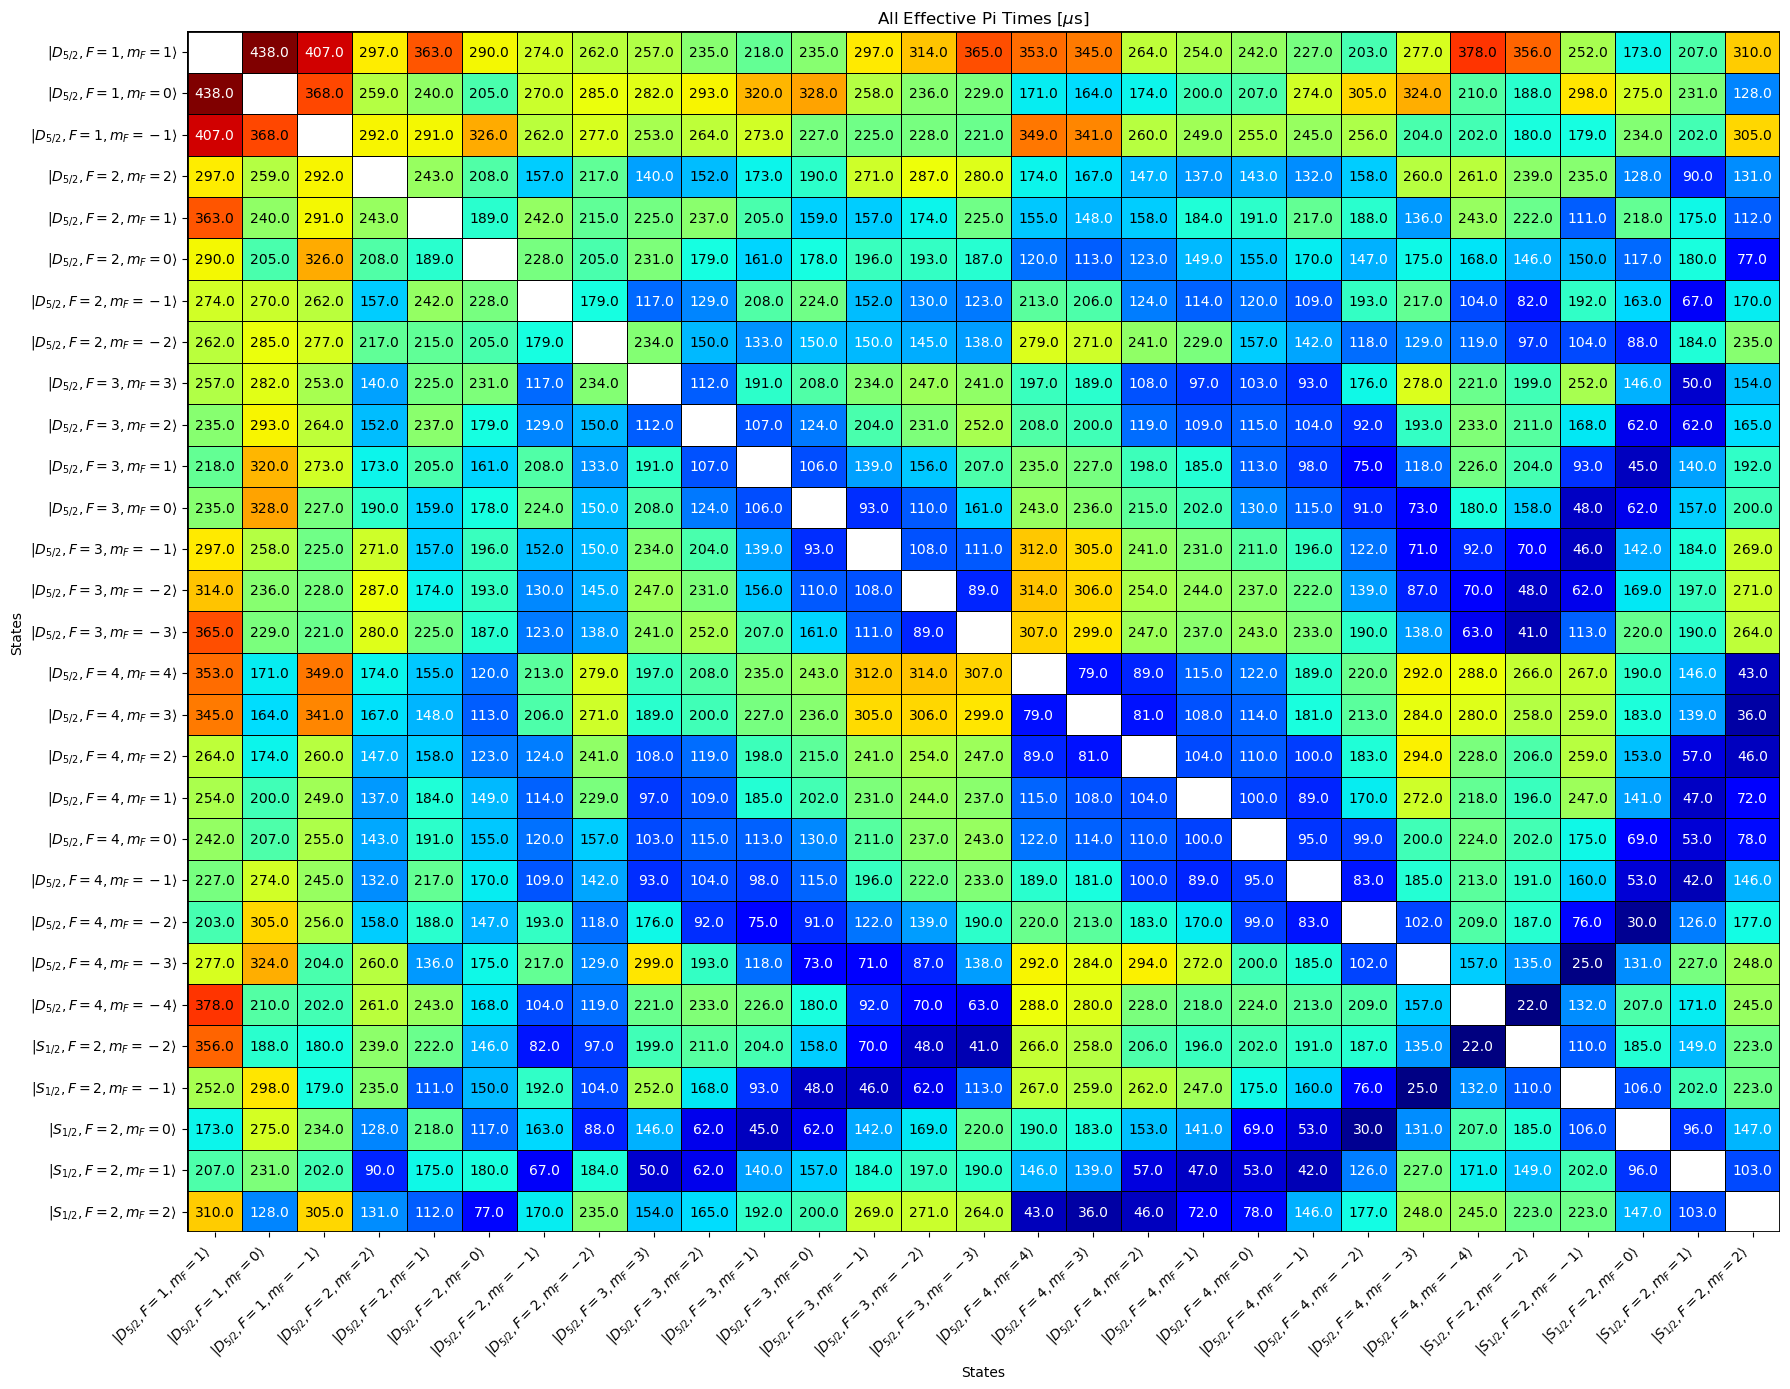

In [19]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap

# Load the .mat file (replace with your actual filename)
mat = scipy.io.loadmat('Full_sensitivity_matrix_with_lables.mat')

# Display the available keys in the .mat file
print("Available variables in the .mat file:")
print(mat.keys())

# Extract the matrix and labels from the .mat file
np.fill_diagonal(pi_times_array, np.nan)
matrix = pi_times_array
x_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]
y_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]

# Verify the shape of the matrix
if matrix.shape == (29, 29):
    print("Successfully loaded a 29x29 matrix.")
else:
    print(f"Matrix shape is {matrix.shape}, not 29x29.")

# Create a heatmap using seaborn with the 'rainbow' colormap
plt.figure(figsize=(18, 14))  # Adjust figure size for better fit
ax = sns.heatmap(matrix, annot=False, fmt='.2f', cmap='jet',
                 xticklabels=x_labels, yticklabels=y_labels, cbar=False, 
                 linewidths=0.5, linecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('States')
plt.ylabel('States')
plt.title('All Effective Pi Times [$\mu$s]')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        value = matrix[i, j] / matrix.max()  # Normalize the value to [0, 1] range
        ax.text(j + 0.5, i + 0.5, f'{np.round(matrix[i, j])}', 
                ha='center', va='center', color='white' if matrix[i, j] > 380 or matrix[i, j]< 150 or np.isnan(matrix[i, j]) else 'black', fontsize=10)

ax.add_patch(Rectangle((0, 0), matrix.shape[1], matrix.shape[0], 
                       fill=False, edgecolor='black', linewidth=2))

# Adjust layout to fit everything neatly
plt.tight_layout()

# plt.savefig('All_effective_pi_times.pdf', dpi = 800)
plt.show()


In [306]:
%matplotlib widget

In [21]:
def get_element(transitions,matrix = pi_times_array):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        col_labels = [-2,-1,0,1,2]
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
        all_labels = row_labels + col_labels
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = all_labels.index(row_label)
        # Find the index of the column label
        col_index = all_labels.index(col_label)
        print(row_index,col_index)
        if row_index is not None and col_index in range(len(all_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list

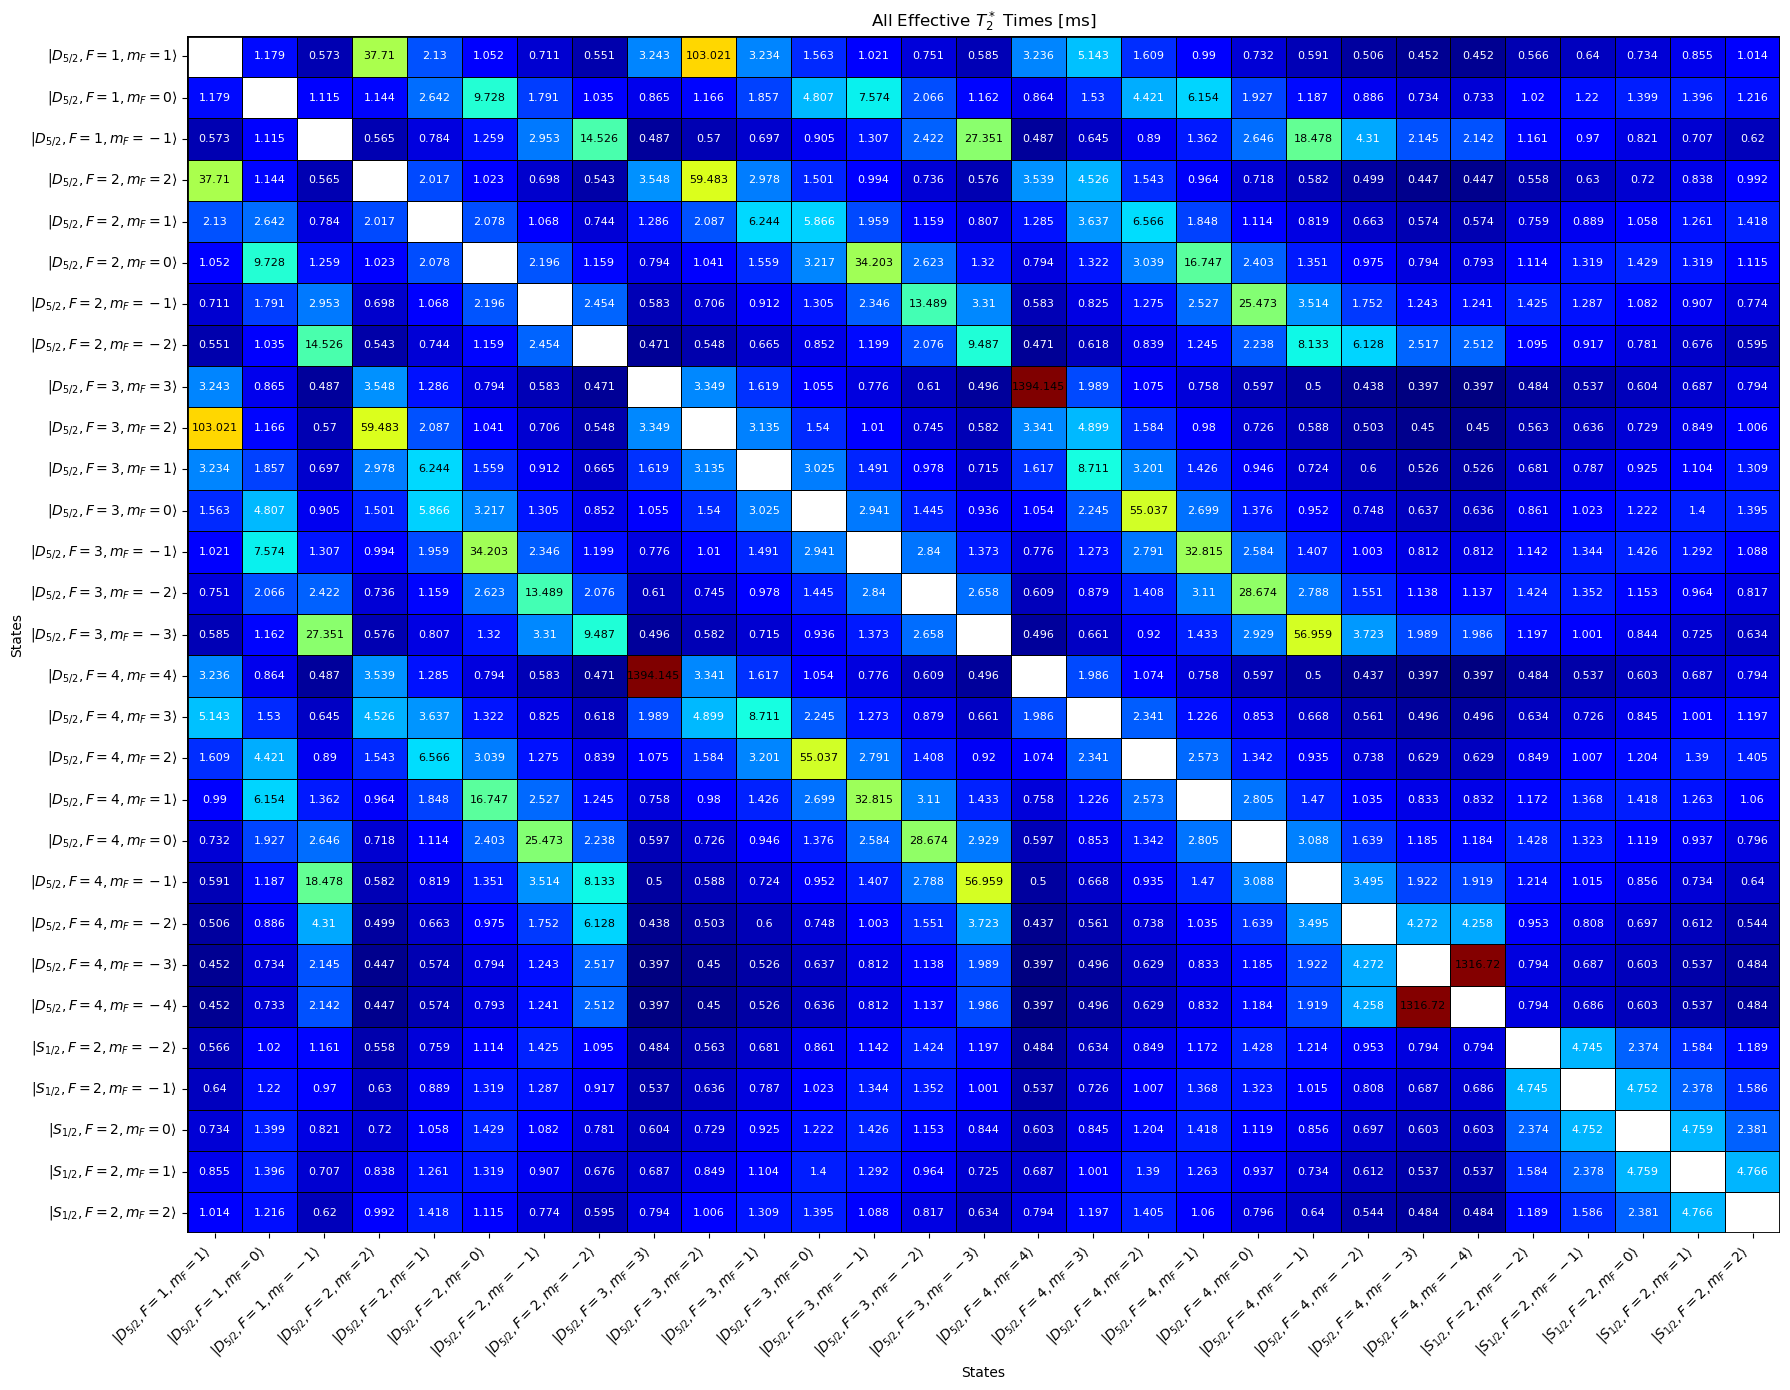

In [107]:
mat = scipy.io.loadmat('Full_sensitivity_matrix_with_lables.mat')
Sen_matrix = mat['Sen_matrix']
x_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]
y_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]

B_N = 0.0003
L_N = 0.0007

L_N_matrix = np.full((29, 29), L_N)

L_N_matrix[0:24, 0:24] = 0  # Adjust the slicing as needed
L_N_matrix[-5:, -5:] = 0  # Adjust the slicing as needed

T2_matrix =(-L_N_matrix + np.sqrt(L_N_matrix**2 + 4*(np.abs(Sen_matrix)*B_N)**2))/(2*(np.abs(Sen_matrix)*B_N)**2)
# T2_matrix = 1/(L_N + np.abs(Sen_matrix)*B_N)
pi_T2_times = pi_times_array/T2_matrix

matrix = T2_matrix

plt.figure(figsize=(18, 14))  # Adjust figure size for better fit
ax = sns.heatmap(np.log(matrix), annot=False, fmt='.2f', cmap='jet',
                 xticklabels=x_labels, yticklabels=y_labels, cbar=False, 
                 linewidths=0.5, linecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('States')
plt.ylabel('States')
plt.title('All Effective $T_2^*$ Times [ms]')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        value = matrix[i, j] / matrix.max()  # Normalize the value to [0, 1] range
        ax.text(j + 0.5, i + 0.5, f'{np.round(matrix[i, j]/1000,3)}', 
                ha='center', va='center', color='white' if matrix[i, j]/1000 < 6  or np.isnan(matrix[i, j]) else 'black', fontsize=8)

ax.add_patch(Rectangle((0, 0), matrix.shape[1], matrix.shape[0], 
                       fill=False, edgecolor='black', linewidth=2))

# Adjust layout to fit everything neatly
plt.tight_layout()

# plt.savefig('All_effective_T2_times.pdf', dpi = 800)
plt.show()

In [284]:
import numpy as np
col_labels = [-2,-1,0,1,2]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
all_labels = row_labels + col_labels
def min_average_and_column_indices(matrix, d):

    sorted_indices = np.argsort(matrix, axis=1)

    first_d_col_indices = sorted_indices[:, :d]

    first_d_elements = np.take_along_axis(matrix, first_d_col_indices, axis=1)

    row_averages = np.mean(first_d_elements, axis=1)

    min_avg = np.min(row_averages)
    min_avg_row_number = np.argmin(row_averages)  

    min_avg_col_indices = first_d_col_indices[min_avg_row_number]

    return min_avg, min_avg_row_number, min_avg_col_indices, sorted_indices[min_avg_row_number]

# Example usage:
matrix = np.random.randint(0, 100, (29, 29))  # Create a 29x29 matrix with random integers
d = 5  # Example dimension

min_avg, min_avg_row_number, min_avg_col_indices, all_indices = min_average_and_column_indices(pi_T2_times[:-5,:-5], d-1)
ket_0 =  str(all_labels[min_avg_row_number])
other_kets = [all_labels[i] for i in min_avg_col_indices]
all_states = [all_labels[i] for i in all_indices]
print("Minimum average of the first", d, "elements:", min_avg)
print("start_node:", ket_0)
print("other_ket:", other_kets)
print('all_states: ',all_states)

Minimum average of the first 5 elements: 0.014599888726760438
start_node: [3, -3]
other_ket: [[4, -1], [1, -1], [2, -2], [4, -4]]
all_states:  [[4, -1], [1, -1], [2, -2], [4, -4], [3, -2], [2, -1], [4, -2], [4, -3], [3, -1], [4, 0], [2, 0], [4, 1], [3, 0], [1, 0], [4, 2], [2, 1], [3, 1], [3, 2], [4, 3], [3, 3], [2, 2], [4, 4], [1, 1], [3, -3]]


In [3]:
ket_0 = str([3, -3])
other_kets = [[4, -1], [1, -1], [2, -2], [4, -4]]

In [5]:
start_node = ket_0
paths = []
for i in other_kets:
    end_node = str(i)
    shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
    fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
    path = [ast.literal_eval(item) for item in fastest_path[0]]
    print(fastest_path)
    paths.append(path)

used_as_bus = []
for j in other_kets:
    for path in paths:    
        if j in path[1:-2]:
            if j not in used_as_bus:
                used_as_bus.append(j)
                print('state used as bus: ', j)

filtered_paths = [
    path for path in paths if path[-1] not in used_as_bus
]

last_state_used = other_kets[-1]
last_index_used = all_states.index(last_state_used)

extra_states = all_states[last_index_used+1: last_index_used+1+len(used_as_bus)]
print(extra_states)
for i in extra_states:
    end_node = str(i)
    shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
    fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
    path = [ast.literal_eval(item) for item in fastest_path[0]]
    print(fastest_path)
    filtered_paths.append(path)

NameError: name 'find_shortest_paths_with_min_weight' is not defined

In [378]:
print(filtered_paths)

[[[4, -2], 0, [4, -1]], [[4, -2], 0, [3, 2]]]


In [380]:
def get_trans(path):
    trans = []
    for i in range(len(path)-1):
        if isinstance(path[i], int):
            l = deque(path[i+1])
            l.appendleft(path[i])
            trans.append(list(l))
        if isinstance(path[i],list):
            l = deque(path[i])
            l.appendleft(path[i+1])
            trans.append(list(l))
    return trans
all_trans = []
for i in paths:
    all_trans.append(get_trans(i))
print(all_trans)

[[[0, 4, -2], [0, 4, -1]], [[0, 4, -2], [0, 3, 2]]]


In [382]:
def assign_states(transitions):
    unique_states = {}
    state_counter = 0

    for path in transitions:
        for transition in path:
            from_state = (transition[0],)
            to_state = tuple(transition[1:])
            if from_state not in unique_states:
                unique_states[from_state] = state_counter
                state_counter += 1
            if to_state not in unique_states:
                unique_states[to_state] = state_counter
                state_counter += 1

    return unique_states

def translate_transitions(transitions, unique_states):
    translated_paths = []
    all_couplings = []

    for path in transitions:
        translated_path = []
        for transition in path:
            from_state = (transition[0],)
            to_state = tuple(transition[1:])
            translated_from = unique_states[from_state]
            translated_to = unique_states[to_state]
            translated_path.append((translated_from, translated_to))
            all_couplings.append((translated_from, translated_to))
        translated_paths.append(translated_path)

    return translated_paths, all_couplings

def wrap_couplings(couplings):
    wrapped_couplings = []
    state_one_couplings = []
    other_couplings = []

    for coupling in couplings:
        if 1 in coupling:
            state_one_couplings.append(coupling)
        else:
            other_couplings.append(coupling)
    wrapped_couplings.extend(other_couplings[::-1])

    # if state_one_couplings:
    #     first_coupling = state_one_couplings.pop(0)
    #     wrapped_couplings.append((first_coupling[1], first_coupling[0]))  # Reverse first coupling

    wrapped_couplings.extend(state_one_couplings)
    wrapped_couplings.extend(other_couplings)

    return wrapped_couplings

print(wrap_couplings([(0,1),(0,2)]))

transitions = all_trans

unique_states = assign_states(transitions)
translated_paths, all_couplings = translate_transitions(transitions, unique_states)

# Generate U1 and U2
U1 = all_couplings
U2 = []

# Print unique states and their assigned numbers
print("Unique States and Assigned Numbers:")
for state, number in unique_states.items():
    print(f"State: {state}, Number: {number}")

# Print translated paths
print("\nTranslated Paths:")
for path in translated_paths:
    U2.extend(wrap_couplings(path))
    print(path)

# Print U1 and U2
print("\nU1 (Original Couplings):")
print(U1)

print("\nU2 (Wrapped Couplings):")
U2.reverse()
print(U2)

trans_mask_U1 = []
trans_mask_U2 = []
phase_mask_U2 = []
num_U1 = 1

comb_U = zip(U1,U2)
for i in U1:
    n1_U1=i[0]
    n2_U1=i[1]
    if n1_U1 ==1 or n2_U1 ==1:
        trans_mask_U1.append(num_U1)

        num_U1 = num_U1 +1
    else:
        trans_mask_U1.append(0)

num_U2 = max(trans_mask_U1)
phase_num =1
for j in U2:
    n1_U2=j[0]
    n2_U2=j[1]
    if n1_U2 ==1 or n2_U2 ==1:
        trans_mask_U2.append(num_U2)
        phase_mask_U2.append(phase_num)
        num_U2 = num_U2 - 1
        phase_num = phase_num + 1
    else:
        trans_mask_U2.append(0)
        phase_mask_U2.append(0)

print('stimulated_phase_mask U1: ', list(0*np.array(trans_mask_U1)))

print('stimulated_phase_mask U2: ',trans_mask_U2)
print(phase_mask_U2)
print(len(trans_mask_U1)+len(trans_mask_U2))

[(0, 2), (0, 1), (0, 2)]
Unique States and Assigned Numbers:
State: (0,), Number: 0
State: (4, -2), Number: 1
State: (4, -1), Number: 2
State: (3, 2), Number: 3

Translated Paths:
[(0, 1), (0, 2)]
[(0, 1), (0, 3)]

U1 (Original Couplings):
[(0, 1), (0, 2), (0, 1), (0, 3)]

U2 (Wrapped Couplings):
[(0, 3), (0, 1), (0, 3), (0, 2), (0, 1), (0, 2)]
stimulated_phase_mask U1:  [0, 0, 0, 0]
stimulated_phase_mask U2:  [0, 2, 0, 0, 1, 0]
[0, 1, 0, 0, 2, 0]
10


In [384]:
def translate_back(couplings, unique_states):
    # Invert the unique_states dictionary to map numbers back to states
    number_to_state = {v: k for k, v in unique_states.items()}
    
    # Translate each coupling back to the original states
    original_couplings = []
    for from_state, to_state in couplings:
        original_from = number_to_state[from_state]
        original_to = number_to_state[to_state]
        original_couplings.append((original_from[0], original_to))
    
    return original_couplings

# Example usage

original_U1 = translate_back(U1, unique_states)
original_U2 = translate_back(U2, unique_states)

list_u1_trans = []
list_u2_trans = []

# Print the original state couplings
print("\nOriginal U1:")
for from_state, to_state in original_U1:
    list_u1_trans.extend([[from_state,to_state[0],to_state[1]]])
    # print(f"({from_state}, {to_state})")
print(list_u1_trans)
print("\nOriginal U2:")
for from_state, to_state in original_U2:
    list_u2_trans.extend([[from_state,to_state[0],to_state[1]]])
    # print(f"({from_state}, {to_state})")
print(list_u2_trans)


Original U1:
[[0, 4, -2], [0, 4, -1], [0, 4, -2], [0, 3, 2]]

Original U2:
[[0, 3, 2], [0, 4, -2], [0, 3, 2], [0, 4, -1], [0, 4, -2], [0, 4, -1]]


In [368]:
U1_times = get_pi_times(list_u1_trans)
U2_times= get_pi_times(list_u2_trans)
print(sum(U1_times))
print(sum(U2_times))
corrected_times_U1 = [] 
fractions_U1 = [] 
for i,coup in enumerate(U1):
    n_ = trans_mask_U1[i]
    Rabi_frequencies = np.pi/U1_times[i]
    n1 = coup[0]
    n2 = coup[1]
    if n1 == 1 or n2 == 1:
        time = 2*np.arcsin(np.sqrt(((d-n_)/ (d + 1 - n_))))*U1_times[i]/np.pi
        fractions_U1.append(1 - (d-n_)/ (d + 1 - n_))
    else:
        time  = 2*np.arcsin(1)*U1_times[i]/np.pi
        fractions_U1.append(1)
    corrected_times_U1.append(time)

print('Fractions U1: ', fractions_U1)

print(corrected_times_U1)

corrected_times_U2 = [] 
fractions_U2 = []
for i,coup in enumerate(U2):
    n_ = trans_mask_U2[i]
    Rabi_frequencies = np.pi/U2_times[i]
    n1 = coup[0]
    n2 = coup[1]
    if n1 == 1 or n2 == 1:
        time = 2*np.arcsin(np.sqrt(((d-n_)/ (d + 1 - n_))))/Rabi_frequencies
        fractions_U2.append(1-(d-n_)/ (d + 1 - n_))
    else:
        time  = 2*(np.arcsin(1)/Rabi_frequencies)
        fractions_U2.append(1)
    corrected_times_U2.append(time)
print('Fractions U2: ', fractions_U2)
print(corrected_times_U2)

379.31033998715
554.0754519862097
Fractions U1:  [0.33333333333333337, 1, 0.5, 1]
[98.68283184096164, 43.639253731343274, 21.14211399404509, 131.12585826771652]
Fractions U2:  [1, 0.5, 1, 1, 0.33333333333333337, 1]
[131.12585826771652, 21.142113994045086, 131.12585826771652, 43.63925373134328, 98.68283184096164, 43.63925373134328]


In [370]:
fixed_phase_mask_U1 = []
sec_one = 0
for i in fractions_U1:
    if i != 1:
        fixed_phase_mask_U1.append(1)
        sec_one = 0
    elif i == 1 and not sec_one:
        fixed_phase_mask_U1.append(0)
        sec_one = 1
    elif i==1 and sec_one:
        fixed_phase_mask_U1.append(1)
        sec_one = 0
fixed_phase_mask_U2 = []
sec_one = 0
for i in fractions_U2:
    if i != 1:
        fixed_phase_mask_U2.append(0)
    elif i == 1 and not sec_one:
        fixed_phase_mask_U2.append(1)
        sec_one = 1
    elif i==1 and sec_one:
        fixed_phase_mask_U2.append(0)
        sec_one = 0

In [372]:
print(fixed_phase_mask_U1)
print(fixed_phase_mask_U2)

[1, 0, 1, 0]
[1, 0, 0, 1, 0, 0]


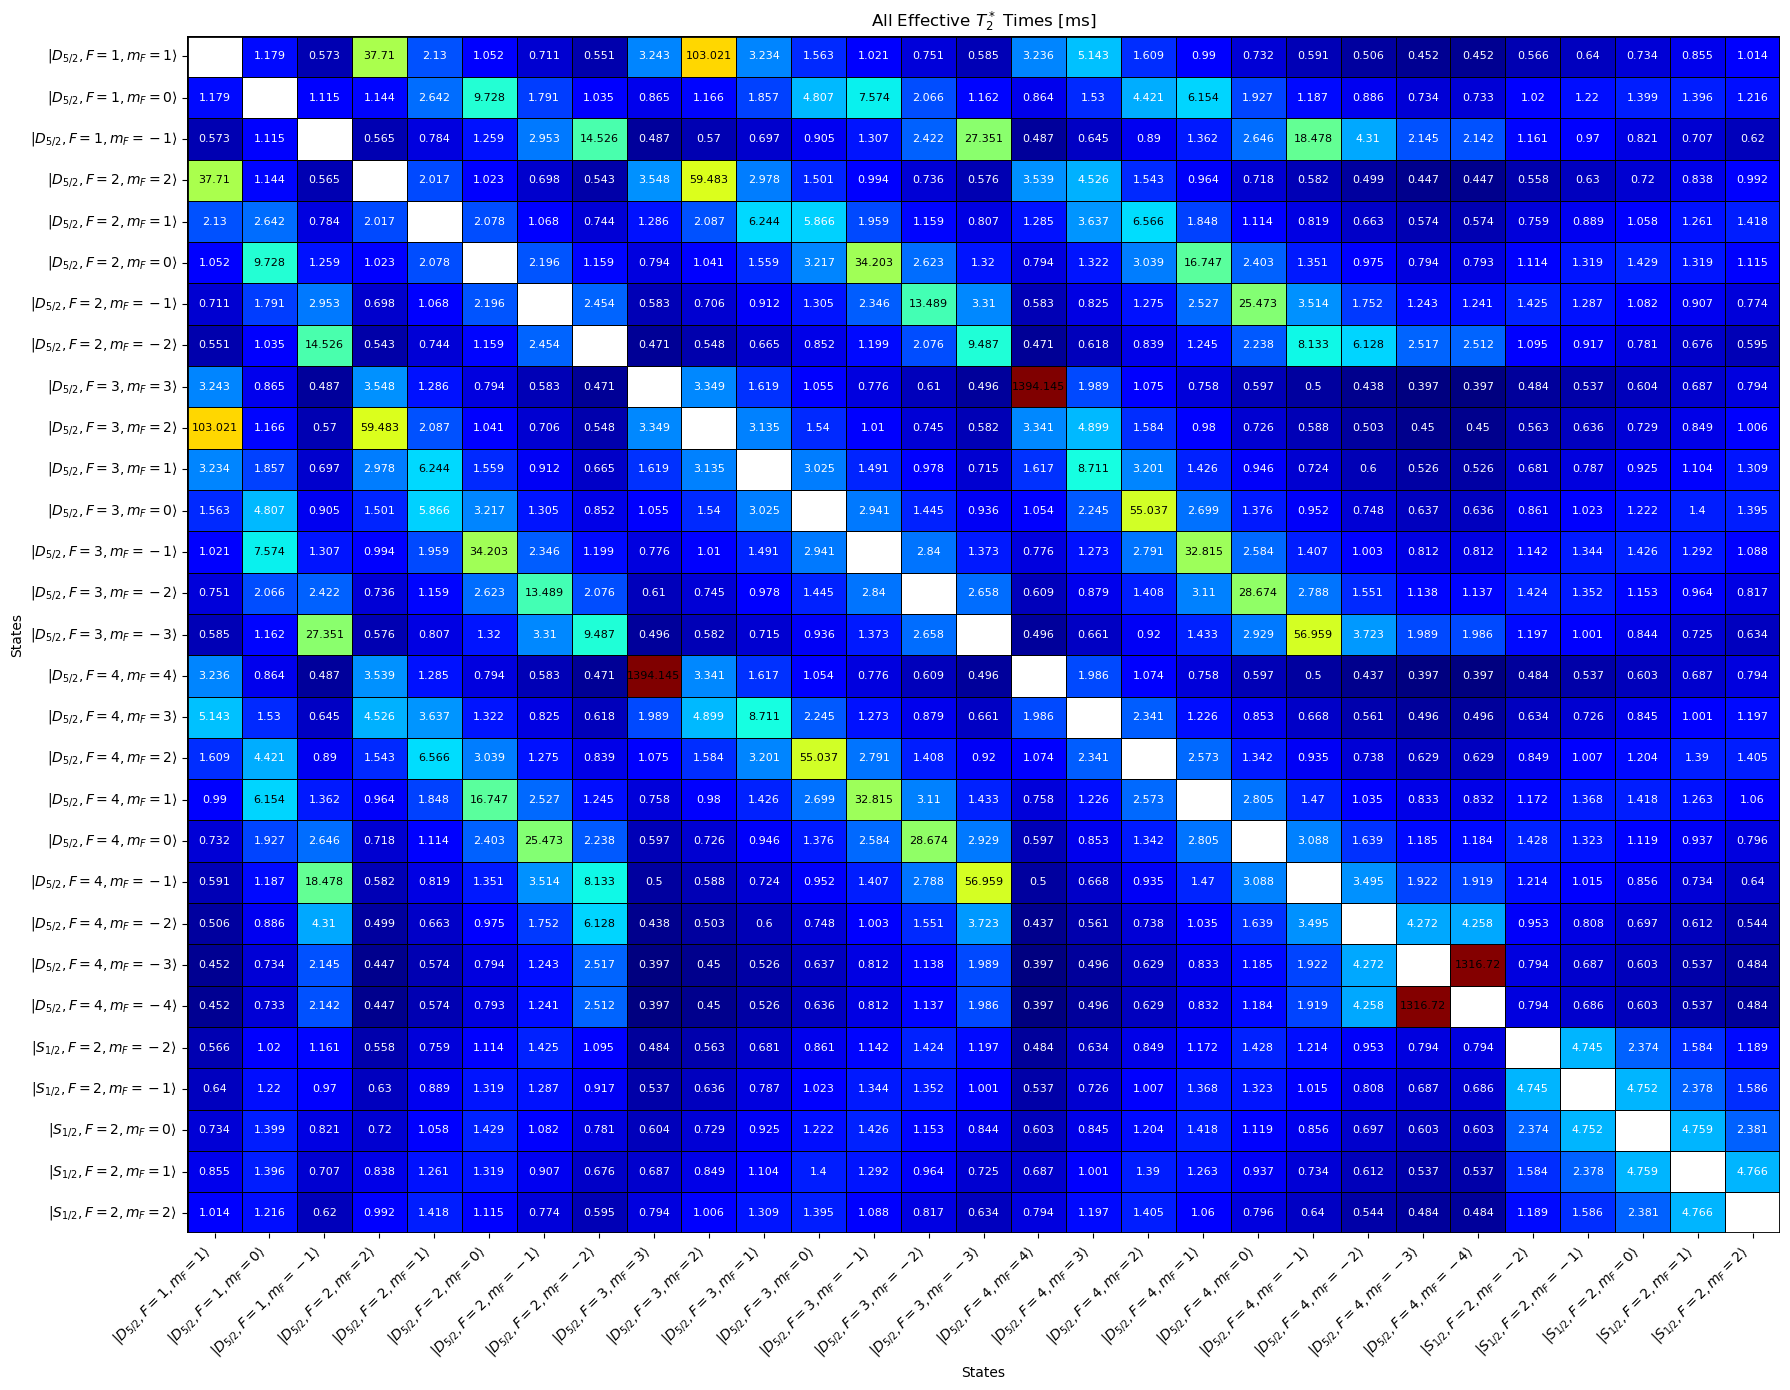

In [280]:
matrix = T2_matrix

plt.figure(figsize=(18, 14))  # Adjust figure size for better fit
ax = sns.heatmap(np.log(matrix), annot=False, fmt='.2f', cmap='jet',
                 xticklabels=x_labels, yticklabels=y_labels, cbar=False, 
                 linewidths=0.5, linecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('States')
plt.ylabel('States')
plt.title('All Effective $T_2^*$ Times [ms]')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        value = matrix[i, j] / matrix.max()  # Normalize the value to [0, 1] range
        ax.text(j + 0.5, i + 0.5, f'{np.round(matrix[i, j]/1000,3)}', 
                ha='center', va='center', color='white' if matrix[i, j]/1000 < 6  or np.isnan(matrix[i, j]) else 'black', fontsize=8)

ax.add_patch(Rectangle((0, 0), matrix.shape[1], matrix.shape[0], 
                       fill=False, edgecolor='black', linewidth=2))

# Adjust layout to fit everything neatly
plt.tight_layout()

# plt.savefig('All_effective_T2_times.pdf', dpi = 800)
plt.show()

In [195]:
pulse_train_U1 = [[-2,2,-2],[-2,1,-1],[-2,2,-2],[-2,3,-3],[0,2,-2],[0,4,-1],[0,2,-2],[0,4,-2],[-2,2,-2],[-2,4,-4],[-2,2,-2],[-2,2,-1],[0,2,-2],[0,4,0],[-2,2,-2],[-2,3,-2],[-1,2,2],[-1,4,-3],[0,2,-2],[0,4,1],[-1,2,-2],[-1,3,-1]]
fractions_U1 = [1/12, 1, 1/11, 1, 1/10, 1, 1/9, 1, 1/8, 1, 1/7, 1, 1/6, 1, 1/5, 1, 1/4, 1, 1/3, 1, 1/2, 1]

#pulse_train_U2 = [[-2,3,-2],[-2,2,-2],[-2,3,-2],[0,4,0],[0,2,-2],[0,4,0],[-2,2,-1],[-2,2,-2],[-2,2,-1],[-2,4,-4],[-2,2,-2],[-2,4,-4],[0,4,-2],[0,2,-2],[0,4,-2],[0,4,-1],[0,2,-2],[0,4,-1],[-2,3,-3],[-2,2,-2],[-2,3,-3],[-2,1,-1],[-2,2,-2],[-2,1,-1]]
#fractions_U2 =       [1,      1,      1,        1,      1/2,     1,        1,      1/3,       1,         1,       1/4,        1,      1,       1/5,     1,        1,      1/6,      1,       1,       1/7,       1,        1,          1/8,      1]

pulse_train_U2 = [[-1,3,-1],[-1,2,-2],[-1,3,-1],[0,4,1],[0,2,-2],[0,4,1],[-1,4,-3],[-1,2,2],[-1,4,-3],[-2,3,-2],[-2,2,-2],[-2,3,-2],[0,4,0],[0,2,-2],[0,4,0],[-2,2,-1],[-2,2,-2],[-2,2,-1],[-2,4,-4],[-2,2,-2],[-2,4,-4],[0,4,-2],[0,2,-2],[0,4,-2],[0,4,-1],[0,2,-2],[0,4,-1],[-2,3,-3],[-2,2,-2],[-2,3,-3],[-2,1,-1],[-2,2,-2],[-2,1,-1]]
fractions_U2 =       [1,      1/2,      1,        1,      1/3,     1,        1,      1/4,       1,         1,       1/5,        1,      1,       1/6,     1,        1,      1/7,      1,       1,       1/8,       1,        1,          1/9,      1,    1,    1/10,    1,    1,    1/11,    1,    1,    1/12,    1]
 
probe_trans = [[-2, 2, -2], [-2, 1, -1], [-2, 3, -3], [0, 4, -1], [0, 4, -2], [-2, 4, -4], [-2, 2, -1], [0, 4, 0], [-2, 3, -2], [-1, 4, -3], [0, 4, 1], [-1, 3, -1]]


simulated_phase_mask_U1=  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
simulated_phase_mask_U2 = [0,11,0,0,10,0,0,9,0,0,8,0,0,7,0,0,6,0,0,5,0,0,4,0,0,3,0,0,2,0,0,1,0]
print(len(simulated_phase_mask_U1),len(simulated_phase_mask_U2))
fixed_phase_mask_U1 =     [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1,0, 1, 0, 1, 0] 
fixed_phase_mask_U2 =     [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
print(len(fixed_phase_mask_U1),len(fixed_phase_mask_U2))
fractions = fractions_U1 + fractions_U2
simulated_phase_mask = simulated_phase_mask_U1 + simulated_phase_mask_U2
fixed_phase_mask = fixed_phase_mask_U1 + fixed_phase_mask_U2
print(len(simulated_phase_mask),len(fixed_phase_mask))

22 33
22 33
55 55


In [158]:
get_pi_times(pulse_train)

[97.056,
 180.01509433962266,
 97.056,
 41.031,
 88.1798108108108,
 53.380135922330105,
 88.1798108108108,
 29.89519616826322,
 97.056,
 21.897,
 97.056,
 82.03611349957008,
 88.1798108108108,
 68.748,
 97.056,
 47.85670682730924,
 0.0,
 25.079792452830183,
 88.1798108108108,
 140.51251840942564,
 104.13170454545455,
 45.61755848575075]